In [1140]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [241]:
# importing excel data
xls = 'V02Max_Combined.xlsx'


'V02Max_Combined.xlsx'

In [1142]:
#importing each sheets in to seperate data frame
data_Kayaking = pd.read_excel(xls,sheet_name = 'Kayaking')
data_Athletes = pd.read_excel(xls, sheet_name = 'Athletes')
data_Triathlon = pd.read_excel(xls,sheet_name =  'Triathlon')
data_Fencing = pd.read_excel(xls,sheet_name =  'Fencing')


In [83]:
data_Triathlon

,ID,time,RR,VO2,power
0,17,-182.408,736.0,0.363762,0
1,17,-181.672,736.0,0.363762,0
2,17,-180.968,704.0,0.363762,0
3,17,-180.268,700.0,0.363762,0
4,17,-179.616,652.0,0.363762,0
...,...,...,...,...,...
4976,18,947.288,536.0,0.507071,0
4977,18,947.816,528.0,0.507071,0
4978,18,948.344,528.0,0.507071,0
4979,18,948.884,540.0,0.507071,0


In [296]:
# Check for duplicate rows
data_Kayaking[data_Kayaking.duplicated()]

,ID,time,RR,VO2,power


In [89]:
# Check for duplicate rows
data_Triathlon[data_Triathlon.duplicated()]

,ID,time,RR,VO2,power


In [93]:
# Check for duplicate rows
data_Fencing[data_Fencing.duplicated()]

,ID,time,RR,VO2,power


In [337]:
#1 Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel
# concating all sports datasets
df_sports=pd.concat([data_Kayaking,data_Triathlon,data_Fencing])

In [339]:
df_sports

,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0
...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0
27599,10,943.124,424.0,0.786363,0
27600,10,943.552,428.0,0.786363,0
27601,10,943.976,424.0,0.786363,0


In [ ]:
# Write the final DataFrame to a new Excel file
output_file = 'merged_athletes_data.xlsx'
df_sports.to_excel(output_file, index=False)
merged_athletes_data



In [345]:
#2 Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

#importing merged data
data='merged_athletes_data.xlsx'
data_merged = pd.read_excel(data)


In [355]:
#define creteria
warm_up_criteria = data_merged['time'] <0
get_criteria = (data_merged['time'] >= 0) & (data_merged['power']>0)
#cool_down_criteria = data_merged['time'] > data_merged[data_merged['time'] >= 0]['time'].max()


In [357]:
# Apply the criteria to label the rows
data_merged['phase'] = 'cool down'  # Default label, in case none of the criteria match
data_merged.loc[warm_up_criteria, 'phase'] = 'Warm Up'
data_merged.loc[get_criteria, 'phase'] = 'GET'
#data_merged.loc[cool_down_criteria, 'phase'] = 'Cool Down'
print(data_merged)

In [365]:
data_merged

,ID,time,RR,VO2,power,phase
0,11,-168.600,727.0,0.287147,0,Warm Up
1,11,-167.872,728.0,0.287147,0,Warm Up
2,11,-167.148,724.0,0.287147,0,Warm Up
3,11,-166.484,664.0,0.320580,0,Warm Up
4,11,-165.836,648.0,0.320580,0,Warm Up
...,...,...,...,...,...,...
52057,10,942.700,428.0,0.786363,0,cool down
52058,10,943.124,424.0,0.786363,0,cool down
52059,10,943.552,428.0,0.786363,0,cool down
52060,10,943.976,424.0,0.786363,0,cool down


In [380]:
# Write the final creteria DataFrame to a new Excel file
output_file = 'crieteria_data.xlsx'
data_merged.to_excel(output_file, index=False)


In [507]:
# 3 What was the average time each tested lasted excluding warm up for all athletes?

#excluding waarm up phase
no_warmup1 = data_merged[data_merged['phase'] != 'Warm Up']

# Calculate the duration for each athlete (i.e., max time for each athlete ID excluding warm-up)
#test_duration_athlete = no_warmup1.groupby(['ID'])['time'].max()

# Calculate the average duration across all athletes
#average_time_phase = test_duration_athlete.mean()

avg_time=no_warmup1.groupby('phase')['time'].mean().reset_index()
avg_time


,phase,time
0,GET,512.492916
1,cool down,993.988405


In [497]:
#5 What was the average time each test lasted (including warm up) for all athletes?

SUB=data_merged.groupby('phase')['time'].mean().reset_index()


In [499]:
SUB

,phase,time
0,GET,512.492916
1,Warm Up,-90.058246
2,cool down,993.988405


In [517]:
#8 What are the names of the kayaking athletes?
#filerting only for kayak sport
kayaking_athletes = data_Athletes[data_Athletes['sport'] == 'kayak']

#printing full name
print(kayaking_athletes['First Name']+" "+kayaking_athletes['Last Name'])


10    Isabella Griffin
11         Caleb Dixon
12       Mia Carpenter
13     Harper Mitchell
14       Mason Wallace
15      Logan Anderson
dtype: object


In [637]:
# 9 What was the average HRV of the triathletes?

#HRV-----Calculate the difference between RR intervals between each row for each athlete, find the standard deviation from the RR intervals.

# finding RR difference with each athlete
data_Triathlon['RR_Diff'] = data_Triathlon.groupby('ID')['RR'].diff()

#finding std deviation from RR intervals
average_hrv = data_Triathlon.groupby('ID')['RR_Diff'].std()

#finding avg of HRV
avg=average_hrv.mean()
#print("The average HRV of the triathletes is:", avg)
print(f"The average HRV of the triathletes is {avg:.2f}")


The average HRV of the triathletes is 29.29


In [633]:
average_hrv

ID
17    28.081705
18    30.505849
Name: RR_Diff, dtype: float64

In [579]:
# 13 Calculate the year of birth of each athlete and store it as a column in the tables.

import datetime
curryear=datetime.date.today().year
data_Athletes['year of birth']=curryear-data_Athletes['age']
print(data_Athletes


    ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    

In [603]:
# 16 Calculate the BMI of every athlete and display it as a list.
#this calculates BMI
data_Athletes['BMI']=round(data_Athletes['Weight']/(data_Athletes['Height']*2),2)

#converting BMI column to list
BMI_list=data_Athletes['BMI'].tolist()
print("List of BMIs for each athlete:",BMI_list)


List of BMIs for each athlete: [0.17, 0.17, 0.24, 0.21, 0.21, 0.19, 0.15, 0.16, 0.16, 0.17, 0.23, 0.23, 0.23, 0.18, 0.18, 0.19, 0.13, 0.13]


In [647]:
#merging joined sports data with athlete data
merged_athlete_sport = data_merged.merge(data_Athletes, on='ID', how='left' )



,ID,time,RR,VO2,power,phase,RR_Diff,HRV,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,year of birth,BMI
0,11,-168.600,727.0,0.287147,0,Warm Up,NaN,NaN,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,2006,0.23
1,11,-167.872,728.0,0.287147,0,Warm Up,1.0,25.844717,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,2006,0.23
2,11,-167.148,724.0,0.287147,0,Warm Up,-4.0,40.725284,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,2006,0.23
3,11,-166.484,664.0,0.320580,0,Warm Up,-60.0,20.398306,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,2006,0.23
4,11,-165.836,648.0,0.320580,0,Warm Up,-16.0,33.334630,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,2006,0.23


In [707]:
# 4 Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

#HRV-----Calculate the difference between RR intervals between each row for each athlete, find the standard deviation from the RR intervals.

# finding RR difference with each athlete
data_merged['RR_Diff'] = data_merged.groupby('ID')['RR'].diff()

#finding std deviation from RR intervals
data_merged['HRV']= data_merged.groupby('ID')['RR_Diff'].transform('std')

#merging joined sports data with athlete data
merged_athlete_sport = data_merged.merge(data_Athletes, on='ID', how='left' )

merged_athlete_sport.head(5)

#finding avg of HRV with each sport
avg_hrv_sport = merged_athlete_sport.groupby('sport')['HRV'].mean()

# Find the sport with the highest average HRV
highest_hrv_sport = avg_hrv_sport.idxmax()
highest_avg_hrv_value = avg_hrv_by_sport.max()

print(f"The sport with the highest HRV is '{highest_hrv_sport}' with an average HRV value of: {highest_avg_hrv_value:.2f}.")

The sport with the highest HRV is 'kayak' with an average HRV value of: 150.51.


In [709]:
# Write the final creteria DataFrame to a new Excel file
output_file = 'athlete_sport_data.xlsx'
merged_athlete_sport.to_excel(output_file, index=False)


In [871]:
# 12 What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.
#Personal V02 per person, is the sum total of all V02 recorded for that athlete divided by body weight to arrive at 
#V02 max in ml per kg of body weight

merged_athlete_sport['Name']=merged_athlete_sport['First Name']+" "+merged_athlete_sport['Last Name']

merged_athlete_sport1=merged_athlete_sport[['ID','Name','sport','VO2','Weight']]

#getting total of vO2 values per athlete
total_vo2_per_athlete = merged_athlete_sport1.groupby(['ID', 'Name','sport','Weight'])['VO2'].sum()
total_vo2_per_athlete=total_vo2_per_athlete.reset_index(name='Total VO2')

# Calculate V02 max in ml/kg
total_vo2_per_athlete['VO2 Max']= total_vo2_per_athlete['Total VO2'] / total_vo2_per_athlete['Weight']

# Sort to find the top 3 VO2 Max values
top_3_vo2_max = total_vo2_per_athlete.nlargest(3,'VO2 Max')
top_3_vo2_max=top_3_vo2_max[['ID', 'Name','sport','VO2 Max']]

# Reset the index to get the names, sport, and VO2 maxes in a DataFrame
#top_3_vo2_max_df = top_3_vo2_max.reset_index()
#top_3_vo2_max_df.columns = ['ID','First Name','Last Name', 'sport','VO2']

print(top_3_vo2_max)



    ID              Name  sport    VO2 Max
11  12       Caleb Dixon  kayak  92.258212
12  13     Mia Carpenter  kayak  90.758693
10  11  Isabella Griffin  kayak  89.586903


In [873]:
# 14 What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

#Personal V02 per person, is the sum total of all V02 recorded for that athlete divided by body weight to arrive at 
#V02 max in ml per kg of body weight

merged_athlete_sport['Name']=merged_athlete_sport['First Name']+" "+merged_athlete_sport['Last Name']

merged_athlete_sport2=merged_athlete_sport[['ID','Name','sport','VO2','Weight']]

#getting total of vO2 values per athlete
total_vo2_per_athlete1 = merged_athlete_sport2.groupby(['ID', 'Name','sport','Weight'])['VO2'].sum()
total_vo2_per_athlete1=total_vo2_per_athlete1.reset_index(name='Total VO2')

# Calculate V02 max in ml/kg
total_vo2_per_athlete1['VO2 Max']= total_vo2_per_athlete1['Total VO2'] / total_vo2_per_athlete1['Weight']

# Sort to find the lowest 3 VO2 Max values
top_3_vo2_max1 = total_vo2_per_athlete1.nsmallest(3,'VO2 Max')
top_3_vo2_max1=top_3_vo2_max1[['ID', 'Name','sport','VO2 Max']]

# Reset the index to get the names, sport, and VO2 maxes in a DataFrame
#top_3_vo2_max_df = top_3_vo2_max.reset_index()
#top_3_vo2_max_df.columns = ['ID','First Name','Last Name', 'sport','VO2']

print(top_3_vo2_max1)


   ID             Name    sport    VO2 Max
6   7    Grace Simmons  fencing  38.403988
1   2   Ethan Reynolds  fencing  38.632602
0   1  Olivia Martinez  fencing  42.807730


In [897]:
# 18 Display the number of athletes in every sport against the name of the sport.

count_athlete_Sport=data_Athletes.groupby('sport')['ID'].nunique()
count_athlete_Sport=count_athlete_Sport.reset_index(name='count of Athlete')
print(count_athlete_Sport)

       sport  count of Athlete
0    fencing                10
1      kayak                 6
2  triathlon                 2


In [919]:
# 17 What is the maximum ventilatory threshold for triathletes.

triathon_VT=data_Athletes[data_Athletes['sport'] == 'triathlon']

max_pvt1=triathon_VT['P_vt1'].max()
max_pvt2=triathon_VT['P_vt2'].max()
print('max value for triathletes for Vantilatory Threshold 1 is:', max_pvt1)
print('max value for for triathletes Vantilatory Threshold 2 is:', max_pvt2)



max value for triathletes for Vantilatory Threshold 1 is: 101
max value for for triathletes Vantilatory Threshold 2 is: 168


In [1107]:
#15 Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
#Zone 1 (recovery/easy)       <100 HR max
#Zone 2 (aerobic/base)        100-120 HR max
#Zone 3 (tempo)        120-135 HR max
#Zone 4 (lactate threshold)        135-155 HR max
#Zone 5 (anaerobic)        155+ HR max and above

# maerging triathlon table with athlete table
merged_athlete_triathlon1 = data_Athletes.merge(data_merged, on='ID', how='right')

# applying condition for HR Max
merged_athlete_triathlon1['HR'] =  60 / (merged_athlete_triathlon1['RR'] / 1000)

#define creteria
Zone_1= merged_athlete_triathlon1['HR'] <100
Zone_2 = (merged_athlete_triathlon1['HR'] >=100 ) & (merged_athlete_triathlon1['HR']<120)
Zone_3=(merged_athlete_triathlon1['HR'] >=120 ) & (merged_athlete_triathlon1['HR']<135)
Zone_4=(merged_athlete_triathlon1['HR'] >=135 ) & (merged_athlete_triathlon1['HR']<155)

#Apply the criteria to label the rows
merged_athlete_triathlon1['Zone'] = 'Zone 5 (Anaerobic)'  # Default label, in case none of the criteria match
merged_athlete_triathlon1.loc[Zone_1, 'Zone'] = 'Zone 1 (Recovery/Easy)'
merged_athlete_triathlon1.loc[Zone_2, 'Zone'] = 'Zone 2 (Aerobic/Base)'
merged_athlete_triathlon1.loc[Zone_3, 'Zone'] = 'Zone 3 (Tempo)'
merged_athlete_triathlon1.loc[Zone_4, 'Zone'] = 'Zone 4 (Lactate Threshold)'


# Write the final DataFrame to a new Excel file
output_file = 'Zone_athlete_data.xlsx'
merged_athlete_triathlon1.to_excel(output_file, index=False)




In [1113]:
# 10 How long was athlete 12 in HR Zone 5?	

#filtering the creietria for ID 12 and HR zone 5
DF=merged_athlete_triathlon1[(merged_athlete_triathlon1['ID'] == 12) & (merged_athlete_triathlon1['Zone'] =='Zone 5 (Anaerobic)' )]

# Calculate the total time spent in HR Zone 5
Zone_5_time = DF['time'].sum()


print(f"Athlete 12 spent {Zone_5_time} seconds in HR Zone 5.")





Athlete 12 spent 1406708.024 seconds in HR Zone 5.


In [1134]:
# 6 What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)? 
#You may choose to show averages based on any one/all sports.

#taking kayaking data

power_value=data_Kayaking[data_Kayaking['power']>0]
most_common_power=power_value['power'].value_counts().idxmax()


#avg time
average_time=power_value[power_value['power']==most_common_power]['time'].mean()
print(f"most common power above 0 is:{most_common_power} watts")
print(f"average time for the sport kayaking with most common wattage is {most_common_power} watts:time taken is {average_time:.2f} seconds")


most common power above 0 is:50 watts
average time for the sport kayaking with most common wattage is 50 watts:time taken is 94.53 seconds


In [1162]:
# 11 Create any 3d plot using any data. Values do not have to be from the dataset given. 

def c(x,y):
    return np.cos(np.sqrt(x**2+y**2))

x=np.linspace(-5,5,25)
y=np.linspace(-5,5,25)

X,Y=np.meshgrid(x,y)
z=c(X,Y)


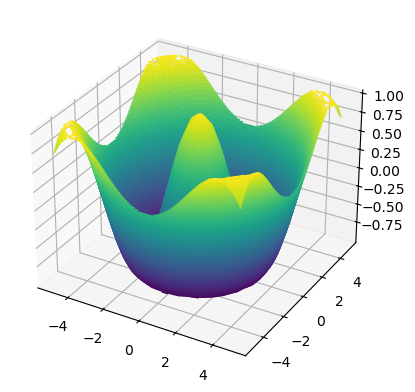

In [1166]:
ax=plt.axes(projection='3d')
ax.contour3D(x,y,z, 100)

In [1180]:
# 19 Display a bar chart showing the average V02 Max by sport.

#Personal V02 per person, is the sum total of all V02 recorded for that athlete divided by body weight to arrive at 
#V02 max in ml per kg of body weight

merged_athlete_sport1=merged_athlete_sport[['ID','Name','sport','VO2','Weight']]

#getting total of vO2 values per athlete
total_vo2_per_athlete = merged_athlete_sport1.groupby(['ID', 'Name','sport','Weight'])['VO2'].sum()
total_vo2_per_athlete=total_vo2_per_athlete.reset_index(name='Total VO2')

# Calculate V02 max in ml/kg
total_vo2_per_athlete['VO2 Max']= total_vo2_per_athlete['Total VO2'] / total_vo2_per_athlete['Weight']

#getting the avg od vo2 max
avg_vo2_max=total_vo2_per_athlete.groupby('sport')['VO2 Max'].mean().reset_index()

# Reset the index to get the names, sport, and VO2 maxes in a DataFrame
#top_3_vo2_max_df = top_3_vo2_max.reset_index()
#top_3_vo2_max_df.columns = ['ID','First Name','Last Name', 'sport','VO2']

#print(top_3_vo2_max)



In [1182]:
avg_vo2_max

,sport,VO2 Max
0,fencing,57.460350
1,kayak,77.345233
2,triathlon,77.499291


([0, 1, 2],
 [Text(0, 0, 'fencing'), Text(1, 0, 'kayak'), Text(2, 0, 'triathlon')])

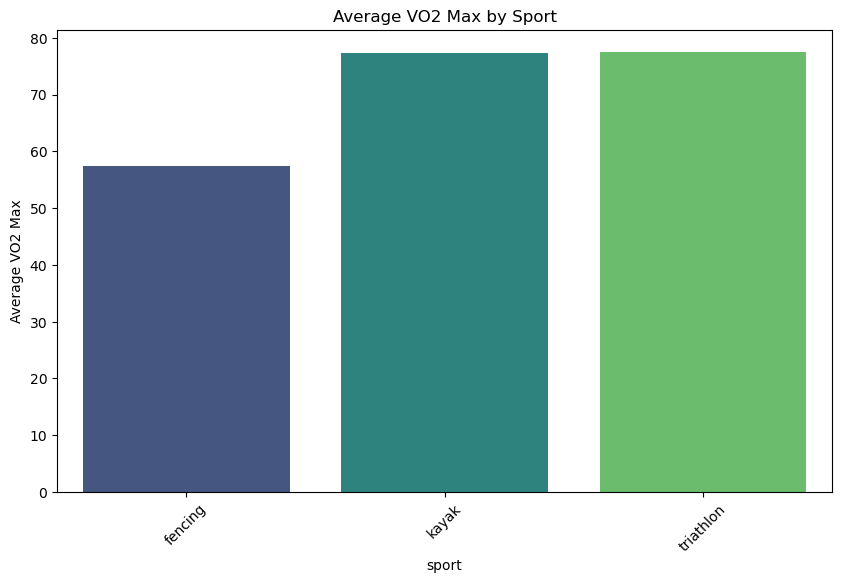

In [1184]:
# Step 2: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='sport', y='VO2 Max', data=avg_vo2_max, palette='viridis')

# Step 3: Customize the plot
plt.title('Average VO2 Max by Sport')
plt.xlabel('sport')
plt.ylabel('Average VO2 Max')
plt.xticks(rotation=45)  # Rotate sport names for better readability

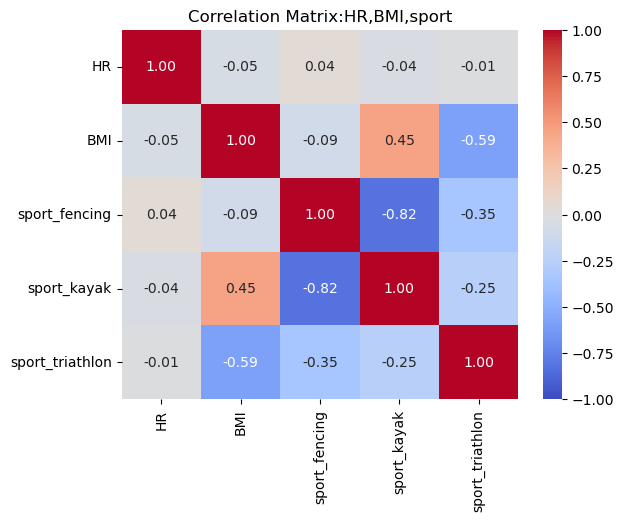

In [1208]:
# 7 Create a correlation matrix to show the relationship between HR, BMI and sport.
columns_to_keep = ['HR', 'sport', 'BMI']

correlation_data=merged_athlete_triathlon1[columns_to_keep]
#finding Correlation:
#correlation_data=Merged_df1[['HR','BMI','sport']]
correlation_encoded = pd.get_dummies(correlation_data, columns = ['sport'])
correlation_matrix=correlation_encoded.corr()
#creating a heatmap:
plt.figure(figure=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',vmin=-1,vmax=1)
#show the plot
plt.title('Correlation Matrix:HR,BMI,sport')
plt.show()




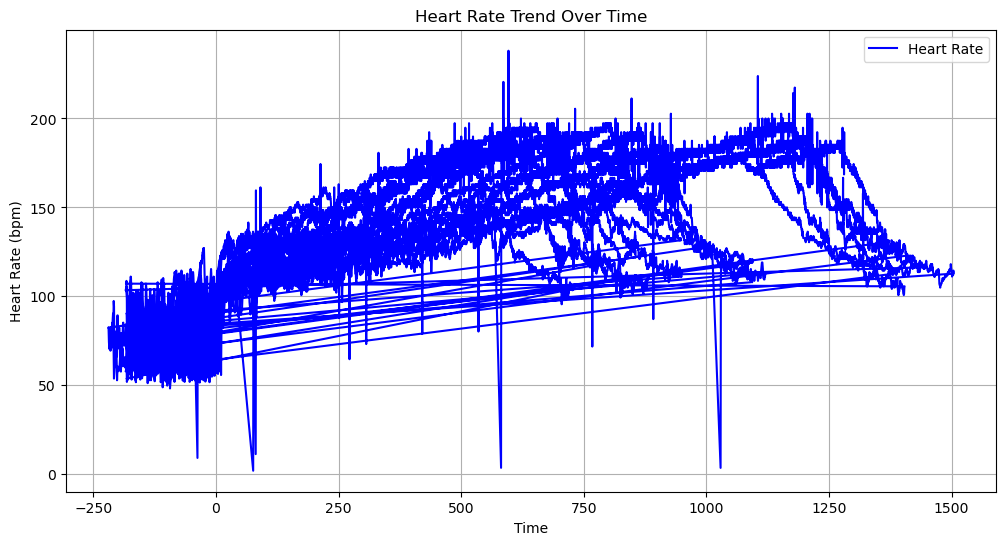

In [1212]:
plt.figure(figsize=(12, 6))
plt.plot(merged_athlete_triathlon1['time'], merged_athlete_triathlon1['HR'], label='Heart Rate', color='blue')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import datetime
Time = datetime.datetime.now()
"%s:%s.%s" % (Time.minute, Time.second, str(Time.microsecond)[:2])
if isinstance(Time,datetime.datetime):
    print ("Yay!")

df3.set_index('Time', inplace=True)